In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
df1 = pd.read_excel("Power Exchange Data_ 2010.xlsx", sheet_name=None)

In [3]:
df1=df1['Daily Prices & Volumes']
df1

,Date,Average price (EUR/MWh),Traded volumes (MWh)
0,2010.07.21,47.803208,2278.1
1,2010.07.22,58.061250,917.6
2,2010.07.23,46.146042,1004.3
3,2010.07.24,43.593292,496.0
4,2010.07.25,19.148125,468.0
...,...,...,...
159,2010.12.27,55.974958,3701.4
160,2010.12.28,42.750333,3693.6
161,2010.12.29,49.985208,4059.6
162,2010.12.30,50.574417,3624.9


In [4]:
df1=df1[["Date","Average price (EUR/MWh)"]]
df1

,Date,Average price (EUR/MWh)
0,2010.07.21,47.803208
1,2010.07.22,58.061250
2,2010.07.23,46.146042
3,2010.07.24,43.593292
4,2010.07.25,19.148125
...,...,...
159,2010.12.27,55.974958
160,2010.12.28,42.750333
161,2010.12.29,49.985208
162,2010.12.30,50.574417


In [5]:
def replace_outliers_with_neighbors(df):
    for i in range(1, len(df) - 1):  
        for j in range(1,2):  
            current_value = df.iloc[i, j]
            upper_value = df.iloc[i - 1, j]
            lower_value = df.iloc[i + 1, j]
            neighbor_values = [upper_value, lower_value]
            mean_neighbor_value = sum(neighbor_values) /2
            if abs(current_value - mean_neighbor_value) > 10 * mean_neighbor_value or current_value<0:  
                df.iloc[i, j] = mean_neighbor_value 

In [6]:
replace_outliers_with_neighbors(df1)

In [7]:
df2=pd.read_excel("Power Exchange Data_ 2011.xlsx", sheet_name=None)
df3=pd.read_excel("Power Exchange Data_ 2012.xlsx", sheet_name=None)
df4=pd.read_excel("Power Exchange Data_ 2013.xlsm", sheet_name=None)
df5=pd.read_excel("Power Exchange Data_ 2014.xlsm", sheet_name=None)
df6=pd.read_excel("Power Exchange Data_ 2015.xlsm", sheet_name=None)
df7=pd.read_excel("Power Exchange Data_ 2016.xlsm", sheet_name=None)
df8=pd.read_excel("Power Exchange Data_ 2017.xlsm", sheet_name=None)

In [8]:
df4.keys()

dict_keys(['Hourly Prices', 'Daily Prices', 'Weekly Prices', 'Monthly Prices', 'Annual Prices'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_3756\3810280529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"]=pd.to_datetime(df1["Date"])


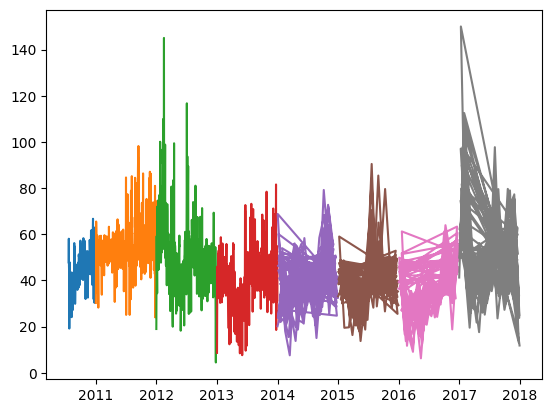

In [9]:
all_prices=[]
all_dates=[]
df1["Date"]=pd.to_datetime(df1["Date"])
plt.plot(df1["Date"],df1["Average price (EUR/MWh)"])
all_prices.extend(df1["Average price (EUR/MWh)"].tolist())
all_dates.extend(df1["Date"].tolist())
dfs=[df2,df3]
dfs2=[df4]
dfs3=[df5,df6,df7,df8]
for i in dfs:
    i=i['Daily Prices & Volumes']
    i=i.groupby("Date").mean().reset_index()
    all_dates.extend(i["Date"].tolist())
    i["Date"]=pd.to_datetime(i["Date"], format='%Y.%m.%d')
    replace_outliers_with_neighbors(i)
    all_prices.extend(i["Average price (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average price (EUR/MWh)"])
    
for i in dfs2:
    i=i['Daily Prices']
    i=i.groupby("Date").mean().reset_index()
    all_dates.extend(i["Date"].tolist())
    i["Date"]=pd.to_datetime(i["Date"], format='%Y.%m.%d')
    replace_outliers_with_neighbors(i)
    all_prices.extend(i["Average prices (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average prices (EUR/MWh)"])  

for i in dfs3:
    i=i['Daily Prices']
    i=i.groupby("Date").mean().reset_index()
    all_dates.extend(i["Date"].tolist())
    i["Date"] = pd.to_datetime(i["Date"], format='%d.%m.%Y')
    all_prices.extend(i["Average Prices (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average Prices (EUR/MWh)"])

<bound method NDFrame.head of           Date  Average Prices (EUR/MWh)
0   2014-01-01                 20.143750
1   2014-02-01                 29.068750
2   2014-03-01                 34.364583
3   2014-04-01                 46.384167
4   2014-05-01                 22.995000
..         ...                       ...
360 2014-05-31                 33.546250
361 2014-07-31                 39.321250
362 2014-08-31                 34.160000
363 2014-10-31                 62.412500
364 2014-12-31                 32.472083

[365 rows x 2 columns]>


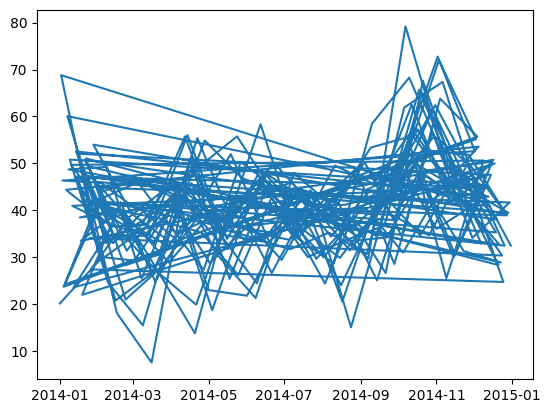

In [10]:
# Assuming df is your DataFrame containing the data

i=df5['Daily Prices']
i=i.groupby("Date").mean().reset_index()
i["Date"] = pd.to_datetime(i["Date"], format='%d.%m.%Y')
replace_outliers_with_neighbors(i)
print(i.head)
plt.plot(i["Date"],i["Average Prices (EUR/MWh)"])

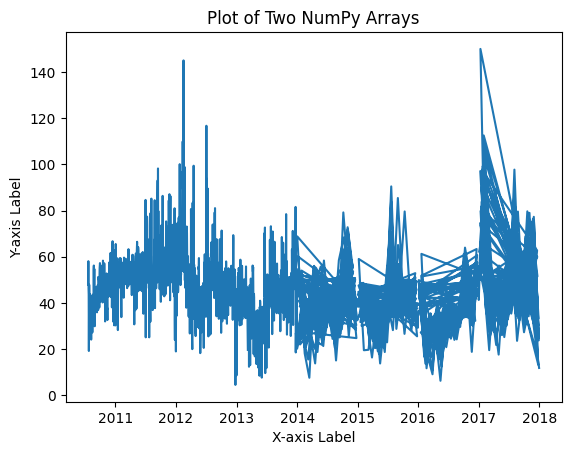

array([Timestamp('2010-07-30 00:00:00'), Timestamp('2010-07-31 00:00:00'),
       Timestamp('2010-08-01 00:00:00')], dtype=object)

In [11]:
import numpy as np
import matplotlib.dates as mdates
all_dates=np.array(all_dates)
dates = pd.to_datetime(all_dates, format='%d.%m.%Y')
all_prices=np.array(all_prices)

plt.plot(dates, all_prices)

# Add labels to the axes
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Add a title to the plot
plt.title('Plot of Two NumPy Arrays')

# Show the plot
plt.show()
all_dates[9:12]

In [12]:
df = pd.DataFrame({'Date': dates, 'Price': all_prices})

In [13]:
df

,Date,Price
0,2010-07-21,47.803208
1,2010-07-22,58.061250
2,2010-07-23,46.146042
3,2010-07-24,43.593292
4,2010-07-25,19.148125
...,...,...
2716,2017-05-31,49.657083
2717,2017-07-31,65.699167
2718,2017-08-31,67.155833
2719,2017-10-31,45.497917


In [14]:
from copy import deepcopy as dc
def shifted(df,n):
    df=dc(df)
    df.set_index("Date",inplace=True)
    for i in range(1,n+1):
        df[f'Price(t-{i})']=df['Price'].shift(i)
    df.dropna(inplace=True)

    return df
shifted_df=shifted(df,7)
shifted_df

,Price,Price(t-1),Price(t-2),Price(t-3),Price(t-4),Price(t-5),Price(t-6),Price(t-7)
Date,,,,,,,,
2010-07-28,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042,58.061250,47.803208
2010-07-29,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042,58.061250
2010-07-30,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042
2010-07-31,38.432792,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292
2010-08-01,28.923208,38.432792,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125
...,...,...,...,...,...,...,...,...
2017-05-31,49.657083,40.936667,112.518750,24.729167,75.273333,42.066250,35.819167,55.554583
2017-07-31,65.699167,49.657083,40.936667,112.518750,24.729167,75.273333,42.066250,35.819167
2017-08-31,67.155833,65.699167,49.657083,40.936667,112.518750,24.729167,75.273333,42.066250


In [15]:
df=shifted_df.to_numpy()

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler(feature_range=(-1,1))
df=scaler.fit_transform(df)
df

array([[-0.46026474, -0.40364806, -0.53740273, ..., -0.42710672,
        -0.26340044, -0.40433846],
       [-0.45834468, -0.46026474, -0.40364806, ..., -0.46217965,
        -0.42710672, -0.26340044],
       [-0.48075343, -0.45834468, -0.46026474, ..., -0.79803843,
        -0.46217965, -0.42710672],
       ...,
       [-0.13844749, -0.15846103, -0.37886757, ..., -0.72135899,
        -0.02691895, -0.48316009],
       [-0.43601149, -0.13844749, -0.15846103, ...,  0.48480594,
        -0.72135899, -0.02691895],
       [-0.89898487, -0.43601149, -0.13844749, ..., -0.49867974,
         0.48480594, -0.72135899]])

In [18]:
X=df[:,1:]
y=df[:,0]
X.shape,y.shape

((2706, 7), (2706,))

In [19]:
split_index = int(len(X) * 0.9)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2435, 7), (271, 7), (2435,), (271,))

In [20]:
lookback=7
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2435, 7, 1), (271, 7, 1), (2435, 1), (271, 1))

In [22]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_3756\1748641444.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).float()
C:\Users\Dell\AppData\Local\Temp\ipykernel_3756\1748641444.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).float()
C:\Users\Dell\AppData\Local\Temp\ipykernel_3756\1748641444.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).float()
C:\Users\Dell\AppData\Local\Temp\ipykernel_3756\1748641444.py:4: UserWarning: To copy constru

(torch.Size([2435, 7, 1]),
 torch.Size([271, 7, 1]),
 torch.Size([2435, 1]),
 torch.Size([271, 1]))

In [23]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [24]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [25]:
device = "cpu"

In [26]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [27]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers, dropout_prob):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)
        
        self.dropout = nn.Dropout(dropout_prob)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out)
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1, dropout_prob = 0.5)
model.to('cpu')
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [28]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    y_true = []
    y_pred = []
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(output.cpu().numpy())

    avg_loss_across_batches = running_loss / len(test_loader)
    r_squared = r2_score(y_true, y_pred)
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('Val R^2: {0:.3f}'.format(r_squared))
    print('***************************************************')
    print()

In [30]:
learning_rate = 0.001
num_epochs = 100

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.199

Val Loss: 0.070
Val R^2: -0.156
***************************************************

Epoch: 2
Batch 100, Loss: 0.123

Val Loss: 0.068
Val R^2: -0.119
***************************************************

Epoch: 3
Batch 100, Loss: 0.101

Val Loss: 0.066
Val R^2: -0.089
***************************************************

Epoch: 4
Batch 100, Loss: 0.080

Val Loss: 0.065
Val R^2: -0.078
***************************************************

Epoch: 5
Batch 100, Loss: 0.072

Val Loss: 0.064
Val R^2: -0.053
***************************************************

Epoch: 6
Batch 100, Loss: 0.055

Val Loss: 0.063
Val R^2: -0.051
***************************************************

Epoch: 7
Batch 100, Loss: 0.048

Val Loss: 0.064
Val R^2: -0.056
***************************************************

Epoch: 8
Batch 100, Loss: 0.043

Val Loss: 0.064
Val R^2: -0.056
***************************************************

Epoch: 9
Batch 100, Loss: 0.037

Val Loss: 0.064
Val R^2

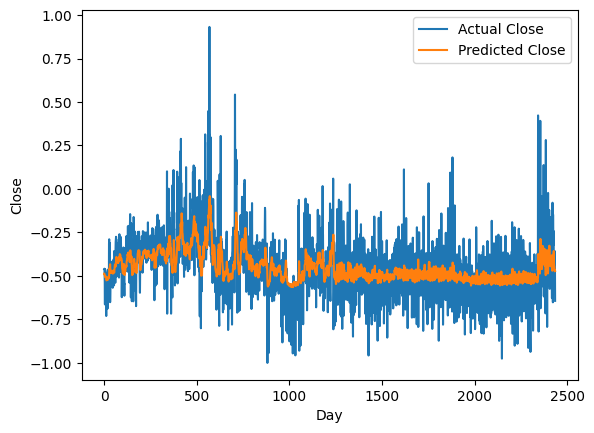

In [31]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [32]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([41.8151345 , 41.80726054, 41.33576454, ..., 42.81098613,
       43.34285347, 42.93038395])

In [33]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([43.73266639, 43.87241719, 42.24141707, ..., 51.25750102,
       47.46708236, 30.41125038])

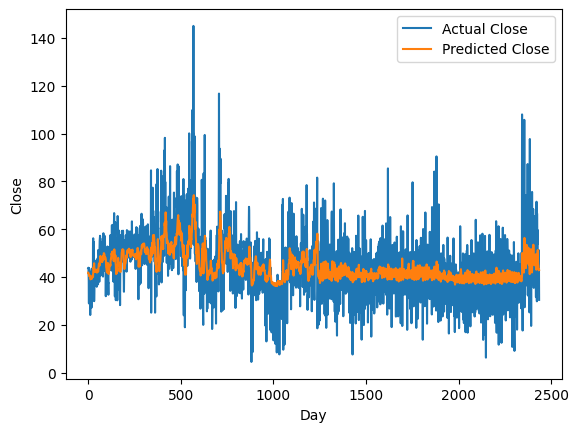

In [34]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [35]:

z=new_y_train-train_predictions
z=np.square(z)
z=np.mean(z)

In [36]:
z=np.sqrt(z)
print('Root Mean Square Error is ', z)

Root Mean Square Error is  11.304936140539107


In [37]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([41.53874777, 44.67170623, 46.30015979, 50.6053552 , 52.02386695,
       49.76607817, 46.83489039, 47.80122879, 45.83134267, 46.27432758,
       50.10527001, 47.29977704, 48.78761432, 53.23781634, 51.64239652,
       58.36949521, 59.19437895, 53.11420606, 52.21801529, 51.22904199,
       47.07069696, 50.96493689, 49.85091951, 46.67774314, 50.21745545,
       52.90160923, 49.07610698, 62.23192913, 59.45080856, 54.50937576,
       54.60321684, 51.32633199, 47.0258653 , 53.16163635, 46.93288103,
       45.64841959, 48.23637444, 47.8866905 , 47.39429706, 54.47865431,
       49.82655797, 44.60091654, 44.44167607, 42.6560644 , 42.62057086,
       44.85684833, 43.61264169, 43.07216289, 45.48139844, 44.27257471,
       43.74271382, 48.70479461, 48.67467401, 46.32461027, 45.82879394,
       45.5169115 , 45.70454594, 48.72829501, 44.38287301, 43.72094222,
       45.34275606, 47.38404573, 47.3888764 , 50.3479267 , 49.34705786,
       47.8490929 , 46.01032443, 43.18204472, 42.9251238 , 44.07

In [38]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 63.55541654,  54.79041745,  74.52416667,  60.65416715,
        42.23874903,  32.91250059,  45.62208414,  42.48875041,
        51.84749899,  81.49916675,  42.41708439,  59.19291695,
        75.01374999,  42.36666721,  97.09041728,  58.64333321,
        38.77166583,  41.21208268,  49.73041761,  38.12708161,
        64.76416651,  68.76958325,  38.24500007,  68.80208338,
        67.44666632,  29.6841653 , 150.01666667,  41.89166589,
        34.4483343 ,  42.51499911,  42.99666618,  30.17958252,
        69.91624989,  65.43500052,  39.97750049,  60.64916621,
        47.15333229,  44.90958432,  79.79083347,  38.02958337,
        26.04833215,  42.30125046,  38.11958508,  42.84666622,
        58.86083228,  52.17166741,  39.4225015 ,  55.31166688,
        38.11833132,  39.01916837,  73.68541674,  56.1104158 ,
        38.62833379,  42.52874925,  49.37041727,  44.41208257,
        60.5658335 ,  35.17541503,  45.60041666,  53.74374951,
        58.37708284,  50.46208389,  66.06708294,  54.24

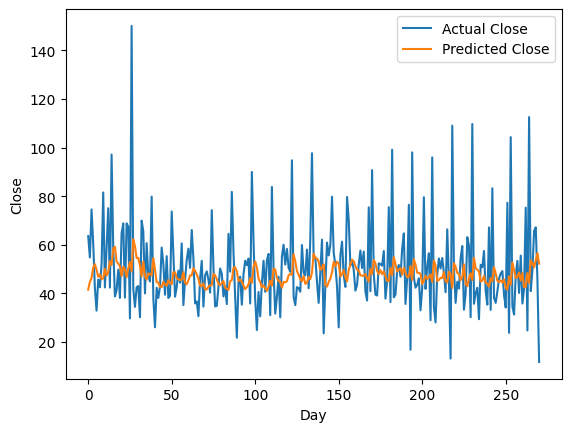

In [39]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


# Till now we trained the model on 90% data and tried to predict the prices for the next 10% . This was done to estimate the efficiency of the model and it was found to be quite effective with an RMSE of 10.20983074206445

# Now we will train it throughout for all the 8 years and then predict the prices for the next year (2018)

In [40]:
X2=X.reshape((-1,7,1))
y2=y.reshape((-1,1))
X2.shape

(2706, 7, 1)

In [41]:
X2=torch.tensor(X2).float()
y2=torch.tensor(y2).float()

In [42]:
train_dataset = PredictionDataset(X2,y2)
train_dataset 

NameError: name 'PredictionDataset' is not defined

In [ ]:
batch_size=16

train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
device='cpu'
train_loader


In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to('cpu'), batch[1].to('cpu')
    print(x_batch.shape, y_batch.shape)
    break
    

In [ ]:
model = LSTM(1, 4, 1)
model.to('cpu')
model

In [ ]:
learning_rate = 0.001
num_epochs = 100

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()

In [ ]:
with torch.no_grad():
    predicted = model(X2.to(device)).to('cpu').numpy()

plt.plot(y2, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
train_predictions1 = predicted.flatten()

dummies = np.zeros((X2.shape[0], 8))
dummies[:, 0] = train_predictions1
dummies = scaler.inverse_transform(dummies)

train_predictions1 = dc(dummies[:, 0])
train_predictions1

In [ ]:
dummies = np.zeros((X2.shape[0], 8))
dummies[:, 0] = y2.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

In [ ]:
shifted_df['Price'][2698]

In [ ]:
data_original=shifted_df

In [ ]:
df_new = pd.DataFrame({'Date': dates, 'Price': all_prices})
new_dates = pd.date_range(start=df_new['Date'].iloc[-1] + pd.Timedelta(days=1), periods=365, freq='D')
new_prices = [float('nan')] * 365 # Initialize prices as NaN
new_df = pd.DataFrame({'Date': new_dates, 'Price': new_prices})
new_df

In [ ]:
for k in range(1,8):
    new_df[f'Price(t-{k})']=new_df['Price'][k]
data_original=new_df
new_df.set_index("Date",inplace=True)
combined_df = pd.concat([shifted_df, new_df], ignore_index=True)
combined_df['Price'][2699]

In [ ]:
data_original=combined_df

In [ ]:
predicted_prices=[]
for i in range(2699,3064):
    for k in range(1,8):
        data_original[f'Price(t-{k})'][i]=data_original['Price'][i-k]
    test=data_original.iloc[i:i+1]
    print(test)
    test=test.to_numpy()
    Xt=test[:,0:]
    Xt=scaler.transform(Xt)

    Xt=Xt[:,1:]

  #yt=test[:,1]
    X_test=Xt.reshape((-1,7,1))
  #y_test=yt.reshape((-1,1))
    X_test=torch.tensor(X_test).float()
  #y_test=torch.tensor(y_test).float()
    with torch.no_grad():
        predicted = model(X_test.to(device)).to('cpu').numpy()
    train_predictions = predicted.flatten()

    dummies = np.zeros((X_test.shape[0], 8))
    dummies[:, 0] = train_predictions
    dummies = scaler.inverse_transform(dummies)

    train_predictions = dc(dummies[:, 0])
    data_original['Price'][i]=train_predictions[0]
    predicted_prices.append(train_predictions[0])


In [ ]:
predicted_prices

In [ ]:
plt.plot(predicted_prices, label='Predictions')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
for i in dfs:
    i=i['Daily Prices & Volumes']
    i["Date"]=pd.to_datetime(i["Date"])
    replace_outliers_with_neighbors(i)
    plt.plot(i["Date"],i["Average price (EUR/MWh)"])
    
for i in dfs2:
    i=i['Daily Prices']
    i["Date"]=pd.to_datetime(i["Date"])
    replace_outliers_with_neighbors(i)
    plt.plot(i["Date"],i["Average prices (EUR/MWh)"])  

for i in dfs3:
    i=i['Daily Prices']
    i=i.groupby("Date").mean().reset_index()
    i["Date"] = pd.to_datetime(i["Date"], format='%d/%m/%Y')
    plt.plot(i["Date"],i["Average Prices (EUR/MWh)"])
    
plt.plot(new_dates,predicted_prices)